# KPI´s

In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from funcion import *
import warnings
warnings.filterwarnings("ignore")

#### Después de un análisis exhaustivo, hemos establecido un KPI que se enfoca en lograr un crecimiento constante en el acceso a Internet en los hogares, con un objetivo específico de alcanzar un incremento del 2% trimestral por provincia. Para calcular este indicador, utilizamos la fórmula que compara el número de nuevos accesos con el acceso actual.

#### La fórmula KPI se define como: 
#### `KPI = ((Nuevo acceso - Acceso actual) / Acceso actual) * 100 = 2%`

In [2]:
df12 =pd.read_excel(r"datasets/Internet_Penetracion.xlsx",sheet_name="Provincia")

In [3]:
df12.head(1)

,Año,Trimestre,Provincia,Accesos por cada 100 hogares,Accesos por cada 100 hab
0,2022,4,Buenos Aires,78.94,26.72


In [4]:
Filtrado = df12.groupby(["Año","Trimestre","Provincia"])["Accesos por cada 100 hogares"].sum().reset_index()

In [5]:
Filtrado = Filtrado.rename(columns={"Accesos por cada 100 hogares":"Accesoactual"})

In [6]:
prox_tris = Filtrado[~((Filtrado["Año"] == 2014) & (Filtrado["Trimestre"] == 1))]

In [7]:
Filtrado.head(1)

,Año,Trimestre,Provincia,Accesoactual
0,2014,1,Buenos Aires,54.570073


In [8]:
prox_tris.reset_index(inplace= True)

In [9]:
prox_tris.head(1)

,index,Año,Trimestre,Provincia,Accesoactual
0,24,2014,2,Buenos Aires,55.061417


In [10]:
Filtrado["Nuevoacceso"] = prox_tris["Accesoactual"]

### Lo guardamos en un excel para poder trabajarlo en nuestro dashboar en PowerBi

In [11]:
Filtrado.to_excel("accesosPorProvincia.xlsx")

In [12]:
Filtrado["Increm_trimestral"] = round((((Filtrado["Nuevoacceso"])-(Filtrado["Accesoactual"]))/Filtrado["Accesoactual"])*100,2)

In [13]:
Filtrado

,Año,Trimestre,Provincia,Accesoactual,Nuevoacceso,Increm_trimestral
0,2014,1,Buenos Aires,54.570073,55.061417,0.90
1,2014,1,Capital Federal,112.254123,113.143352,0.79
2,2014,1,Catamarca,24.251751,24.703119,1.86
3,2014,1,Chaco,20.718539,20.957996,1.16
4,2014,1,Chubut,41.235218,41.410210,0.42
...,...,...,...,...,...,...
859,2022,4,Santa Cruz,43.530000,NaN,NaN
860,2022,4,Santa Fe,78.400000,NaN,NaN
861,2022,4,Santiago Del Estero,48.050000,NaN,NaN
862,2022,4,Tierra Del Fuego,101.440000,NaN,NaN


In [14]:
Filtrado["KPI"] = Filtrado["Increm_trimestral"]

In [15]:
Filtrado["KPI"] = Filtrado["KPI"].apply(lambda x: True if x > 1.99 else False)

In [16]:
Filtrado

,Año,Trimestre,Provincia,Accesoactual,Nuevoacceso,Increm_trimestral,KPI
0,2014,1,Buenos Aires,54.570073,55.061417,0.90,False
1,2014,1,Capital Federal,112.254123,113.143352,0.79,False
2,2014,1,Catamarca,24.251751,24.703119,1.86,False
3,2014,1,Chaco,20.718539,20.957996,1.16,False
4,2014,1,Chubut,41.235218,41.410210,0.42,False
...,...,...,...,...,...,...,...
859,2022,4,Santa Cruz,43.530000,NaN,NaN,False
860,2022,4,Santa Fe,78.400000,NaN,NaN,False
861,2022,4,Santiago Del Estero,48.050000,NaN,NaN,False
862,2022,4,Tierra Del Fuego,101.440000,NaN,NaN,False


<function matplotlib.pyplot.show(close=None, block=None)>

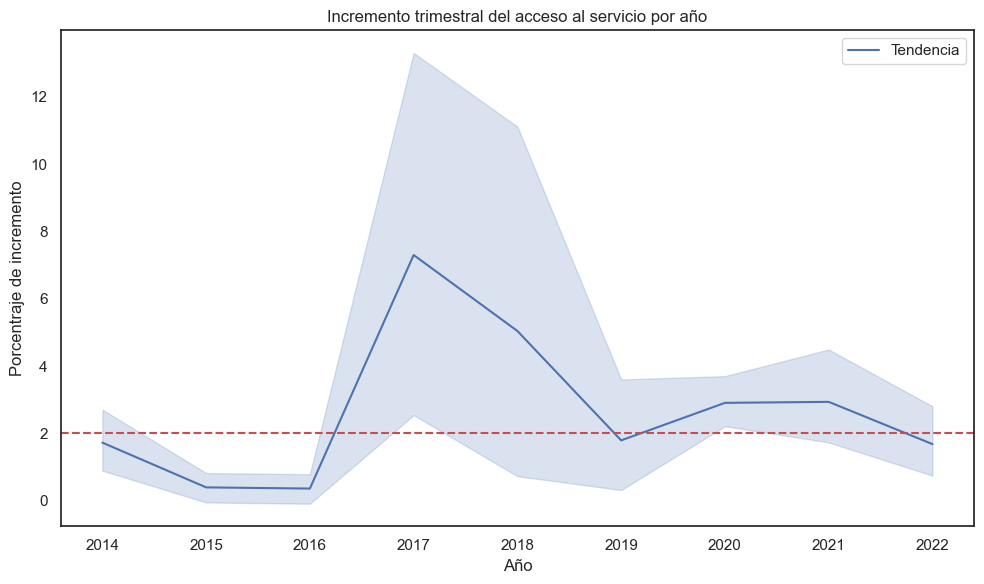

In [17]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= Filtrado, x="Año", y="Increm_trimestral", label="Tendencia")


plt.title("Incremento trimestral del acceso al servicio por año")
plt.xlabel("Año")
plt.ylabel("Porcentraje de incremento")
plt.axhline(y= 2,color='r', linestyle='--')
plt.tight_layout()

plt.show

# KPI2


#### Con el objetivo de mejorar nuestro servicio, hemos establecido un KPI centrado en el incremento anual del acceso a Internet a través de la tecnología de fibra óptica. Nuestra meta es lograr un crecimiento del 25% anual en la adopción de esta tecnología.

#### La fórmula del KPI se define de la siguiente manera: KPI = ((Total de fibra óptica anual - Total de fibra óptica año anterior) / Total de fibra óptica año anterior) * 100 = 25%. Esta fórmula nos permitirá evaluar si estamos cumpliendo con nuestro objetivo de expansión de la fibra óptica y si estamos mejorando constantemente nuestro servicio en esta área.

In [18]:
df9 = pd.read_excel(r"datasets/Internet_Accesos-por-tecnologia.xlsx",sheet_name="Total")

In [30]:
df9.head(5)

,Año,Trimestre,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total,Periodo
0,2022,4,1315373,6037457,3060575,572969,221740,11208114,Oct-Dic 2022
1,2022,3,1395277,6031970,2871541,557110,235230,11091128,Jul-Sept 2022
2,2022,2,1468333,5979214,2723285,556243,231609,10958684,Abr-Jun 2022
3,2022,1,1533240,6073426,2219533,545814,251996,10624009,Ene-Mar 2022
4,2021,4,1657615,5984240,2072236,523107,252596,10489794,Oct-Dic 2021


In [20]:
tec_año = df9.groupby("Año")[["ADSL", "Cablemodem", "Fibra óptica","Wireless","Otros","Total"]].sum().reset_index()

In [22]:
tec_año

,Año,ADSL,Cablemodem,Fibra óptica,Wireless,Otros,Total
0,2014,14884750,9975087,604862,305234,286700,26056633
1,2015,15115694,11162971,620877,331431,242846,27473819
2,2016,15073814,12177088,680127,337396,227633,28496058
3,2017,14639302,14148063,766312,432844,344162,30330683
4,2018,13981984,16571272,1079124,870047,465760,32968187
5,2019,11447626,18754974,3191409,1262831,909341,35566181
6,2020,9072828,20539964,4636620,1563813,958018,36771243
7,2021,7802044,22877010,6473506,1927038,1006793,40086391
8,2022,5712223,24122067,10874934,2232136,940575,43881935


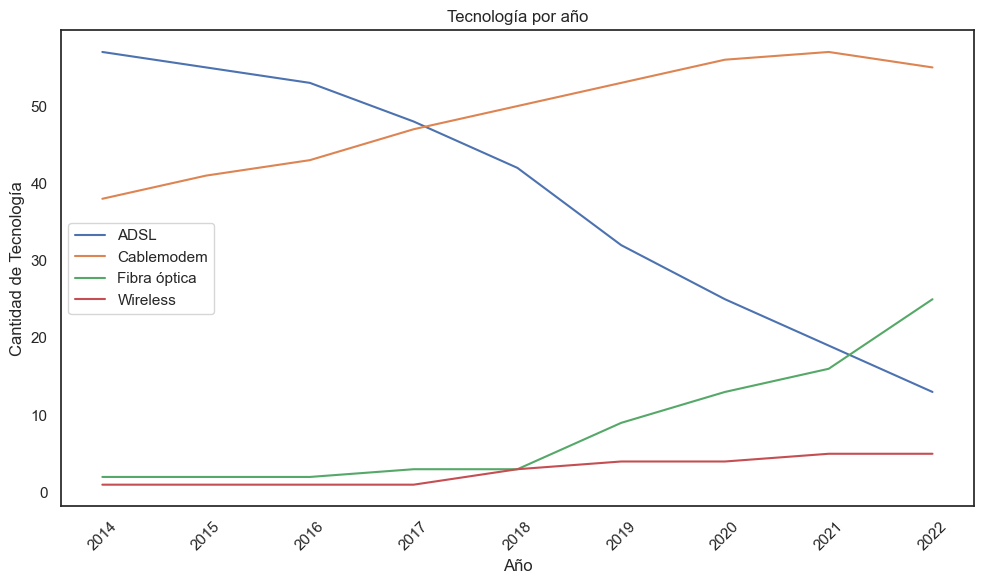

In [32]:
sns.set(style="white")

plt.figure(figsize=(10, 6))
sns.lineplot(data= tec_año, x="Año", y="ADSL", label="ADSL")
sns.lineplot(data= tec_año, x="Año", y="Cablemodem", label="Cablemodem")
sns.lineplot(data= tec_año, x="Año", y="Fibra óptica", label="Fibra óptica")
sns.lineplot(data= tec_año, x="Año", y="Wireless", label="Wireless")


plt.title("Tecnología por año")
plt.xlabel("Año")
plt.ylabel("Cantidad de Tecnología")
plt.xticks(rotation=45)
plt.tight_layout()

### Lo guardamos en un excel para poder trabajarlo en nuestro dashboar en PowerBi

In [21]:
tec_año.to_excel("tecnologíaAño.xlsx")